In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend

In [25]:
coffee_df = pd.read_csv('coffee_prices-1.csv')
coffee_df.head()

,Month,Year,CPI
0,January,1990,62.75
1,February,1990,67.01
2,March,1990,75.25
3,April,1990,75.34
4,May,1990,73.30


In [26]:
coffee_df['Month'] = pd.to_datetime(coffee_df['Month'], format='%B').dt.month
coffee_df

,Month,Year,CPI
0,1,1990,62.75
1,2,1990,67.01
2,3,1990,75.25
3,4,1990,75.34
4,5,1990,73.30
...,...,...,...
331,8,2017,128.24
332,9,2017,124.46
333,10,2017,120.01
334,11,2017,117.26


In [27]:
coffee_groupings = coffee_df.groupby(['Year', 'Month'])['CPI'].sum().reset_index()
coffee_groupings.head()

,Year,Month,CPI
0,1990,1,62.75
1,1990,2,67.01
2,1990,3,75.25
3,1990,4,75.34
4,1990,5,73.30


In [28]:
coffee_groupings['Date'] = pd.to_datetime(coffee_groupings['Year'].astype(str) + '-' + coffee_groupings['Month'].astype(str),
                                        format='%Y-%m')
coffee_groupings['Date']

0     1990-01-01
1     1990-02-01
2     1990-03-01
3     1990-04-01
4     1990-05-01
         ...    
331   2017-08-01
332   2017-09-01
333   2017-10-01
334   2017-11-01
335   2017-12-01
Name: Date, Length: 336, dtype: datetime64[ns]

In [29]:
coffee_ts = pd.Series(coffee_groupings['CPI'].values, index=coffee_groupings['Date'])
coffee_ts.index.freq = 'MS'
coffee_ts

Date
1990-01-01     62.75
1990-02-01     67.01
1990-03-01     75.25
1990-04-01     75.34
1990-05-01     73.30
               ...  
2017-08-01    128.24
2017-09-01    124.46
2017-10-01    120.01
2017-11-01    117.26
2017-12-01    114.00
Freq: MS, Length: 336, dtype: float64

Text(0.5, 1.0, 'Coffee Time Series')

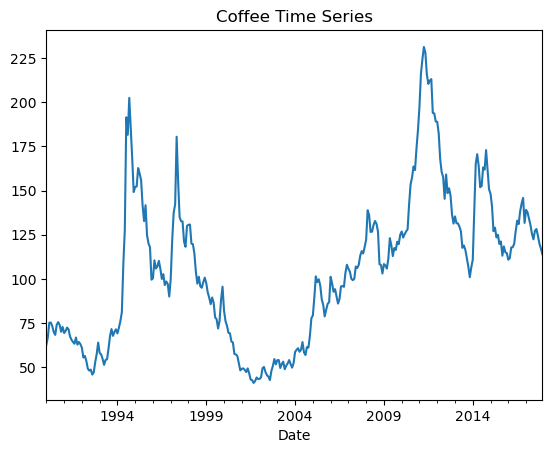

In [30]:
coffee_ts.plot()
plt.title('Coffee Time Series')

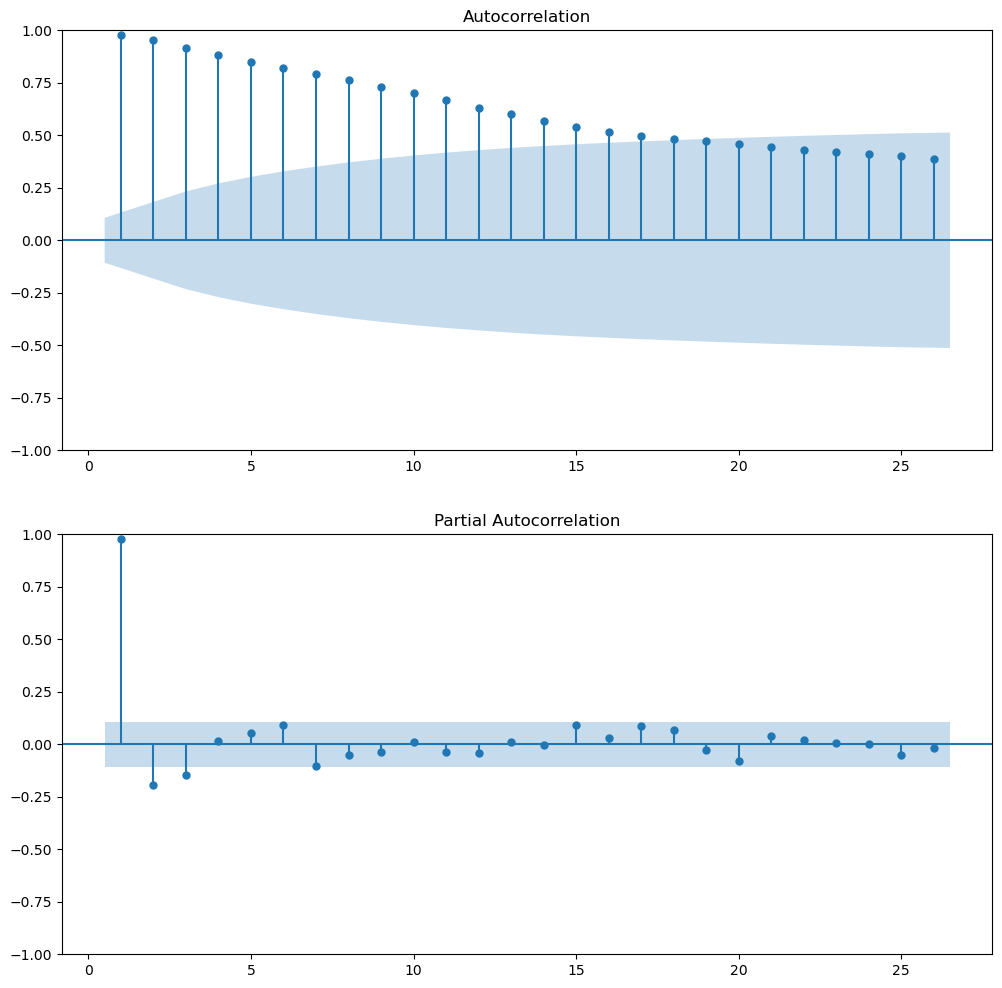

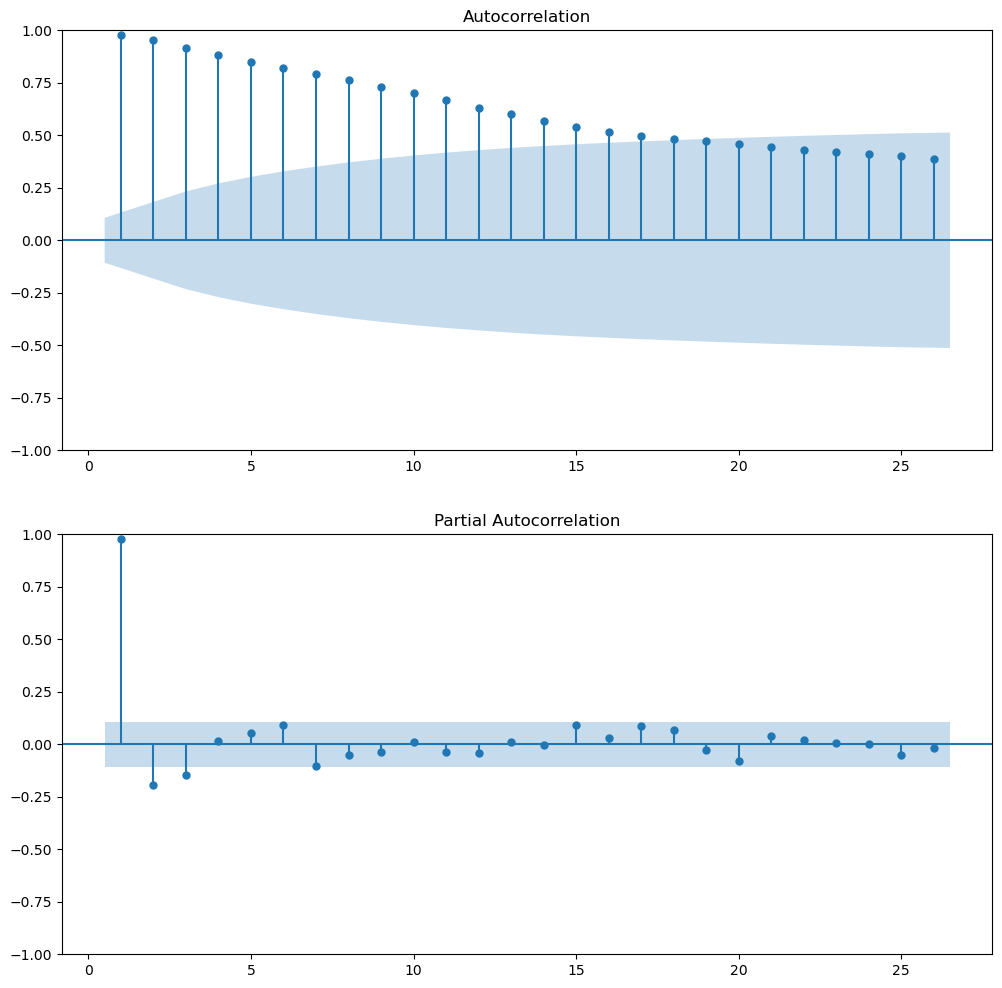

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(coffee_ts, ax1, zero=False)
plot_pacf(coffee_ts, ax2, zero=False)

In [32]:
sm.stats.acorr_ljungbox(coffee_ts, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2441.982433,0.0


In [33]:
adfuller(coffee_ts, regression='c')

(-2.3656190658161536,
 0.1516761740924007,
 6,
 329,
 {'1%': -3.4503836022181056,
  '5%': -2.8703653471616826,
  '10%': -2.571471939191249},
 2229.58476924153)

In [40]:
def arima_evaluation(ts, p, d, q):
    fit_ar = ARIMA(ts, order=(p,d,q)).fit()

    print(fit_ar.summary())

    residuals = fit_ar.resid
    plt.plot(residuals)
    plt.title('Residual Plot')

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

    plot_acf(residuals, ax=ax1, zero=False)
    plot_pacf(residuals, ax=ax2, zero=False)
    
    print(sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True))
    print(adfuller(residuals, regression='c'))


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1182.104
Date:                Wed, 02 Oct 2024   AIC                           2370.209
Time:                        10:15:33   BIC                           2381.660
Sample:                    01-01-1990   HQIC                          2374.774
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.8890     26.999      3.737      0.000      47.973     153.805
ar.L1          0.9799      0.012     83.419      0.000       0.957       1.003
sigma2        65.9479      2.115     31.182      0.0

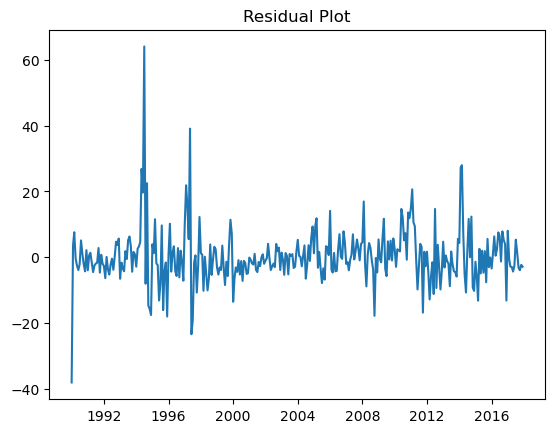

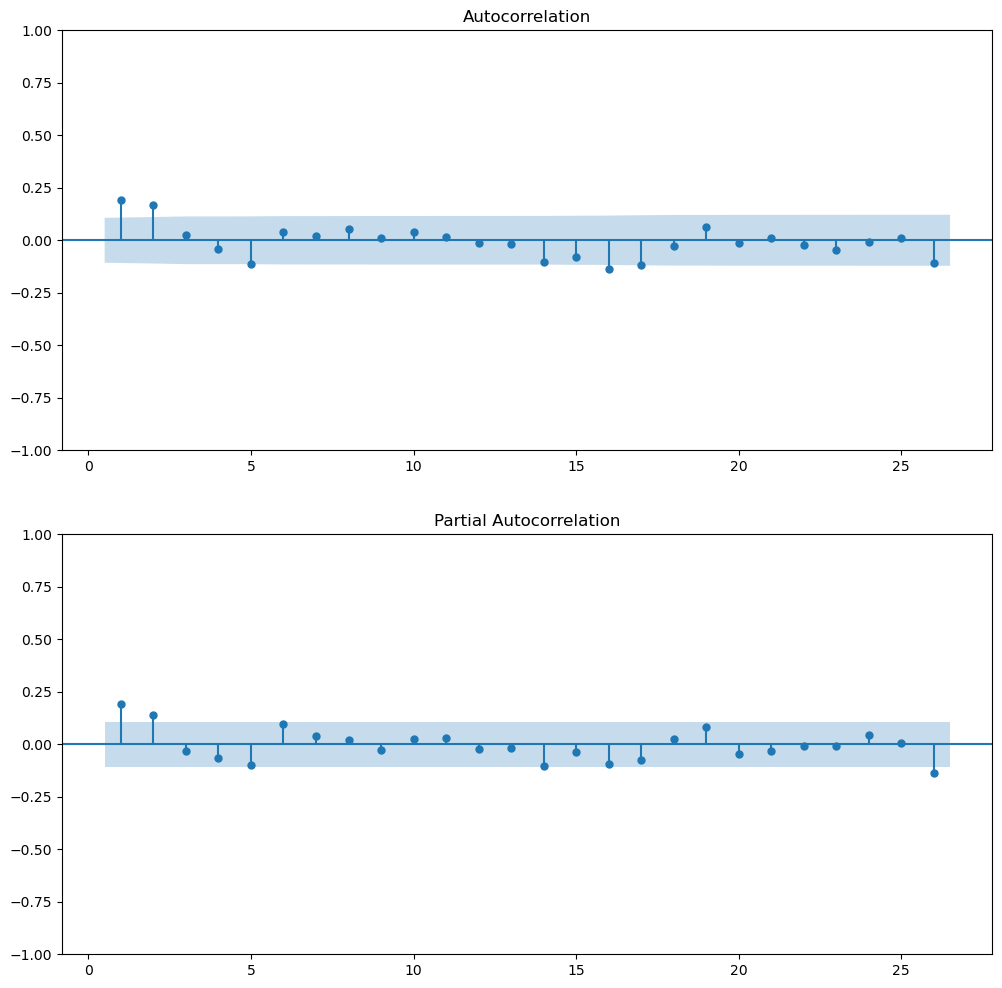

In [41]:
arima_evaluation(coffee_ts, 1, 0, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1174.429
Date:                Wed, 02 Oct 2024   AIC                           2356.857
Time:                        10:16:09   BIC                           2372.126
Sample:                    01-01-1990   HQIC                          2362.944
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5903     22.379      4.674      0.000      60.728     148.452
ar.L1          1.1877      0.028     42.037      0.000       1.132       1.243
ar.L2         -0.2114      0.030     -7.152      0.0

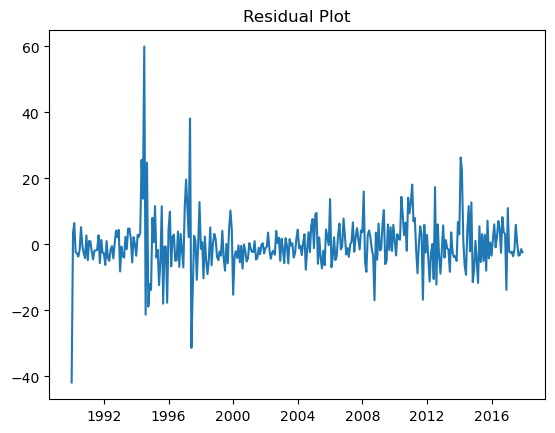

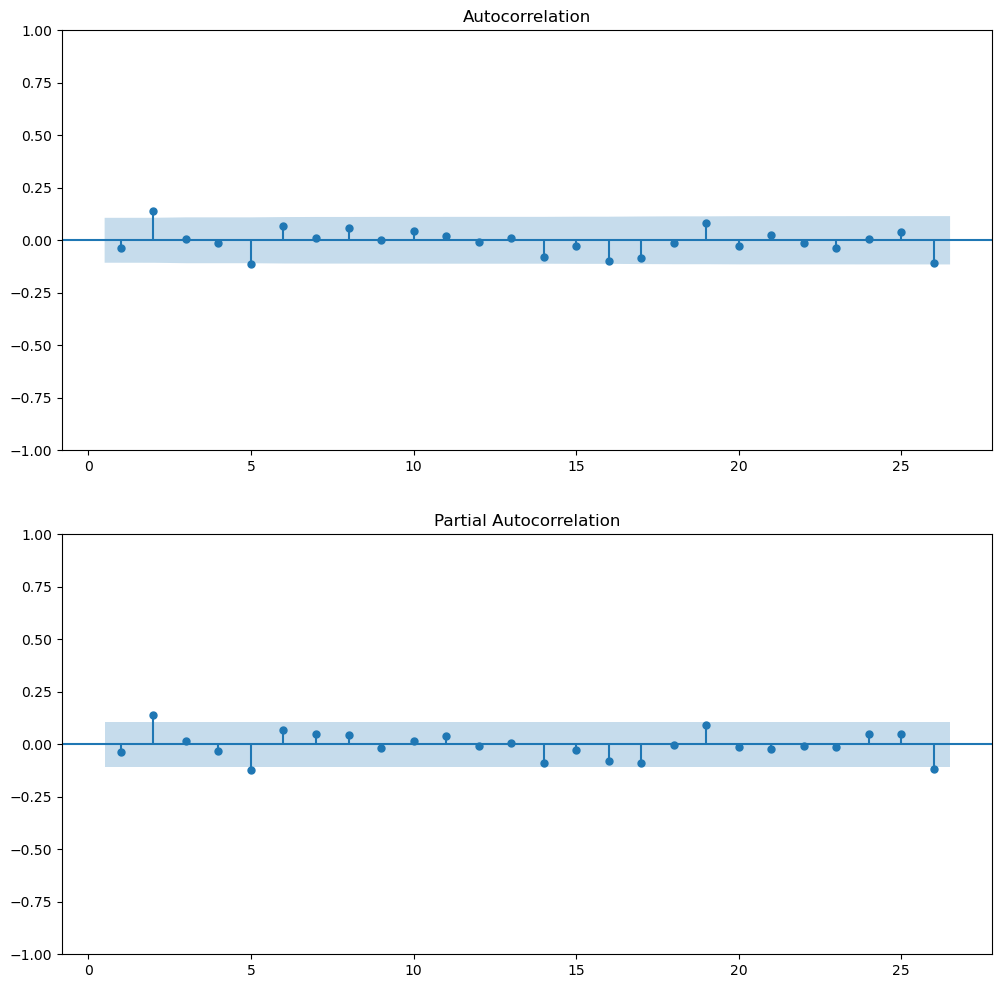

In [42]:
arima_evaluation(coffee_ts, 2, 0, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1169.590
Date:                Wed, 02 Oct 2024   AIC                           2349.179
Time:                        10:16:37   BIC                           2368.265
Sample:                    01-01-1990   HQIC                          2356.787
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5782     19.422      5.385      0.000      66.512     142.644
ar.L1          1.1520      0.028     41.092      0.000       1.097       1.207
ar.L2         -0.0112      0.049     -0.228      0.8

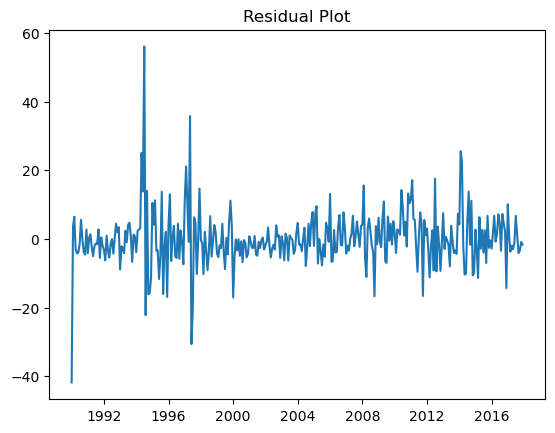

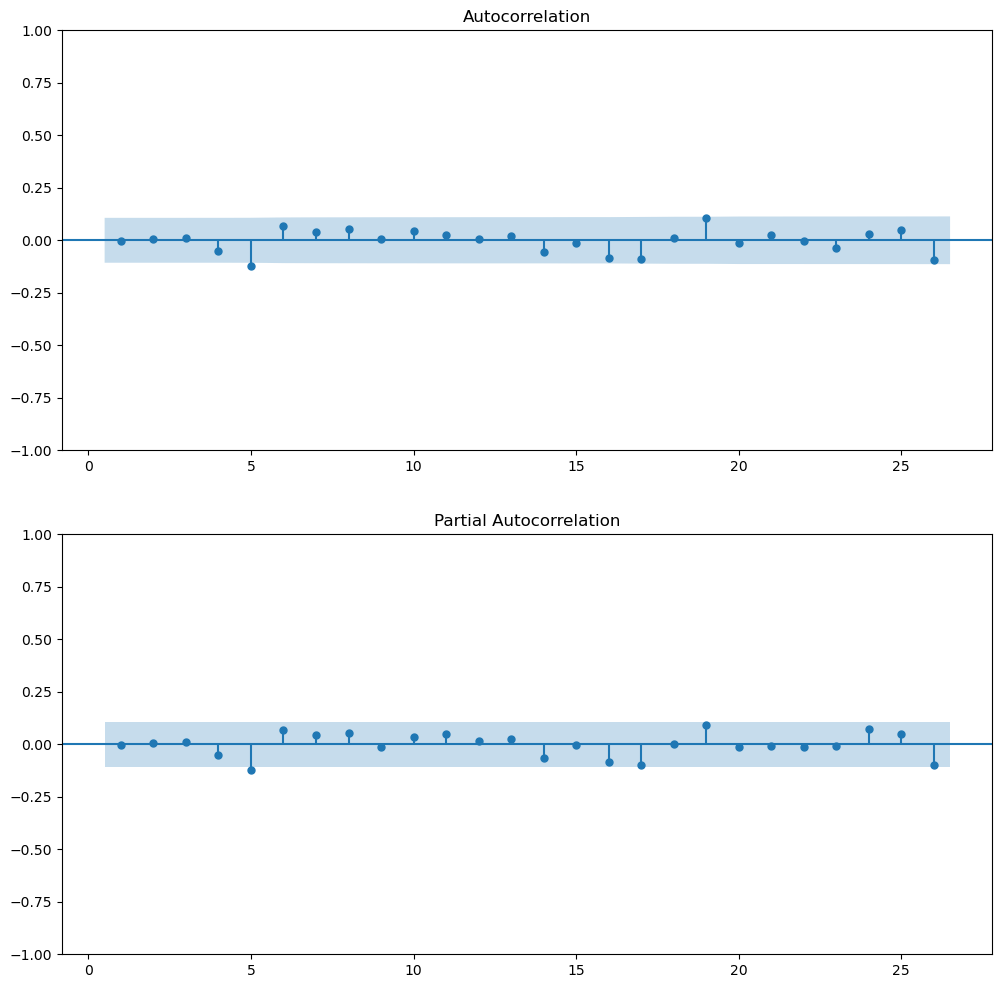

In [43]:
arima_evaluation(coffee_ts, 3, 0, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1171.919
Date:                Wed, 02 Oct 2024   AIC                           2347.837
Time:                        10:16:59   BIC                           2355.466
Sample:                    01-01-1990   HQIC                          2350.879
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2005      0.026      7.812      0.000       0.150       0.251
sigma2        63.9778      1.993     32.108      0.000      60.072      67.883
Ljung-Box (L1) (Q):                   0.31   Jarque-

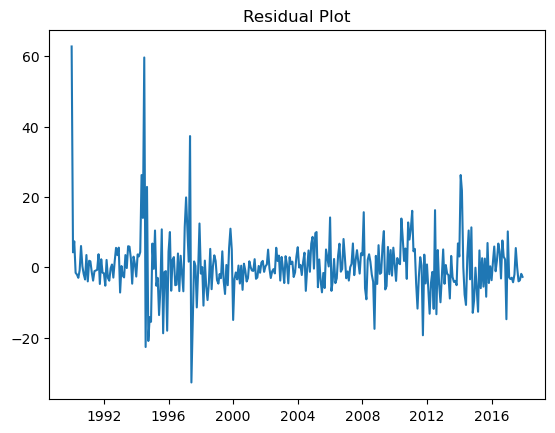

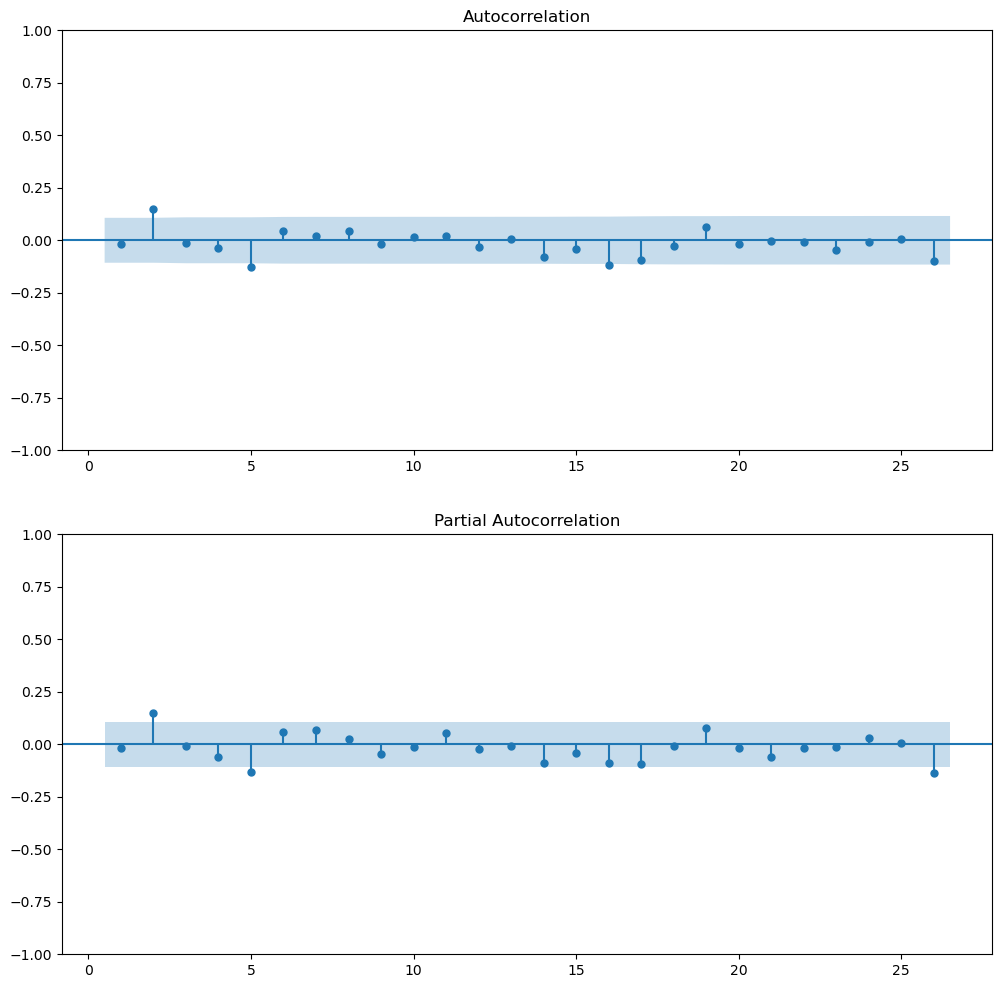

In [44]:
arima_evaluation(coffee_ts, 1, 1, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1169.923
Date:                Wed, 02 Oct 2024   AIC                           2345.846
Time:                        10:19:07   BIC                           2357.288
Sample:                    01-01-1990   HQIC                          2350.408
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5229      0.114      4.574      0.000       0.299       0.747
ma.L1         -0.3242      0.130     -2.492      0.013      -0.579      -0.069
sigma2        63.2161      2.177     29.032      0.0

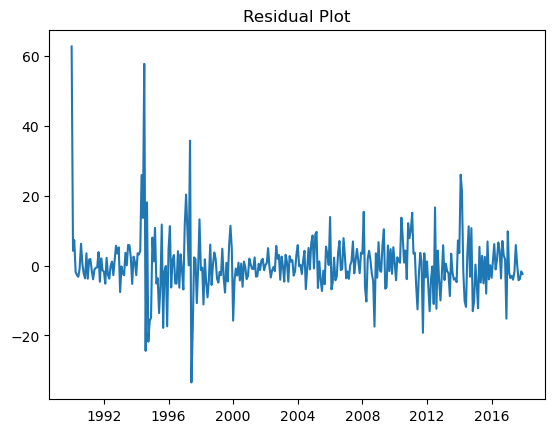

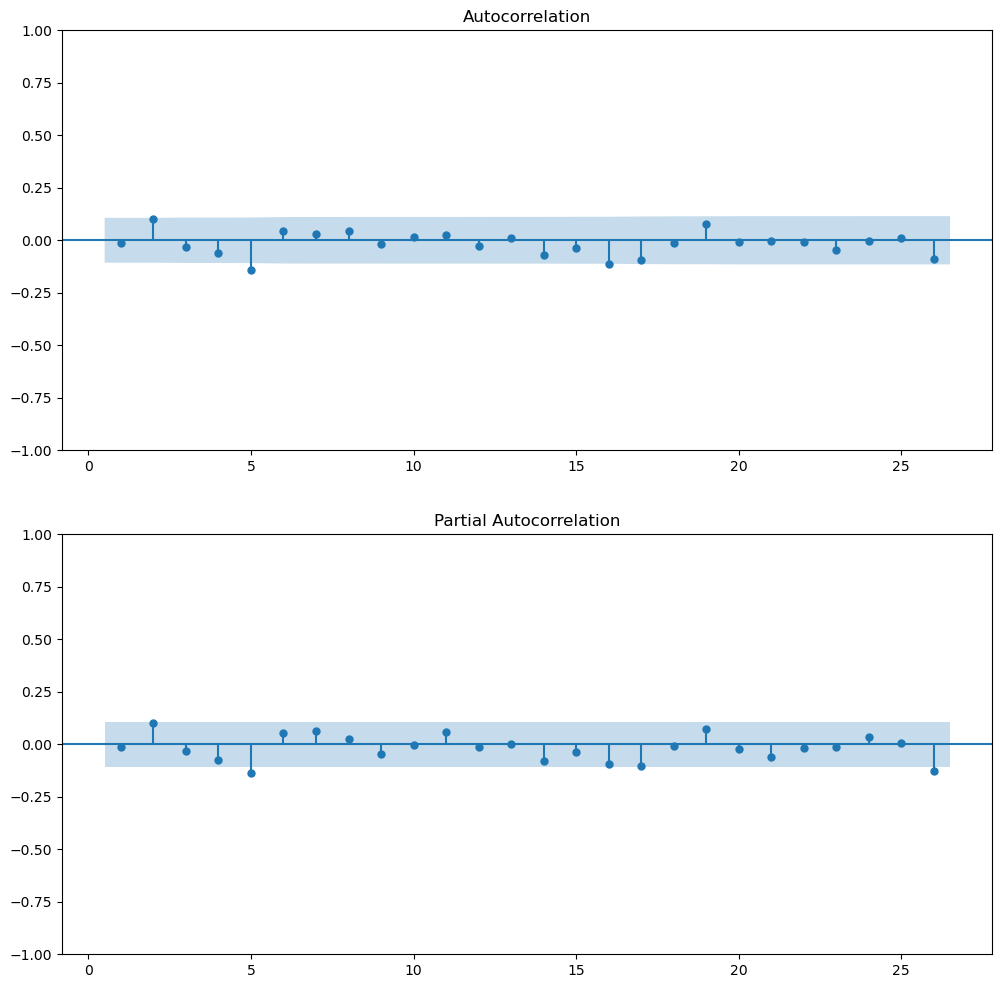

In [47]:
arima_evaluation(coffee_ts, 1,1,1)

In [55]:
model_5 = ARIMA(coffee_ts, order=(1,0,0)).fit()

pred = model_5.get_prediction()
print(pred)

In [56]:
predicted_mean = pred.predicted_mean
conf_int = pred.conf_int()

pred_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:,0],
    'upper_bound': conf_int.iloc[:,1]
})

pred_df.head()

,predicted_mean,lower_bound,upper_bound
Date,,,
1990-01-01,100.889010,21.100333,180.677688
1990-02-01,63.516551,47.600008,79.433093
1990-03-01,67.690929,51.774387,83.607472
1990-04-01,75.765315,59.848773,91.681857
1990-05-01,75.853506,59.936964,91.770048


In [57]:
prediction_df = pd.concat([pred_df,coffee_ts.to_frame(name='CPI')], axis=1)
prediction_df.head()

,predicted_mean,lower_bound,upper_bound,CPI
Date,,,,
1990-01-01,100.889010,21.100333,180.677688,62.75
1990-02-01,63.516551,47.600008,79.433093,67.01
1990-03-01,67.690929,51.774387,83.607472,75.25
1990-04-01,75.765315,59.848773,91.681857,75.34
1990-05-01,75.853506,59.936964,91.770048,73.30


In [59]:
#Error
errors = prediction_df['CPI'] - prediction_df['predicted_mean']

#Absolute value of error
errors_abs = errors.abs()

#mape
mape = (errors_abs/prediction_df['CPI'].abs()).mean() * 100

#rmse
rmse = (errors**2).mean()**0.5

print(f'Mape {mape}%')
print(f'rmse {rmse}')


Mape 5.142268131944083%
rmse 8.372851395697383


In [60]:
#6 months forecast
forecast = model_5.get_forecast(steps=6)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

forecast_df = pd.DataFrame({
    'Forecasted CPI': mean_forecast,
    'lower_bound': confidence_intervals.iloc[:,0],
    'upper_bound': confidence_intervals.iloc[:,1]
    })

forecast_df

,Forecasted CPI,lower_bound,upper_bound
2018-01-01,113.736484,97.819942,129.653026
2018-02-01,113.478264,91.193933,135.762596
2018-03-01,113.225235,86.203642,140.246828
2018-04-01,112.977291,82.083169,143.871413
2018-05-01,112.734330,78.531961,146.936699
2018-06-01,112.496253,75.393860,149.598646


InvalidIndexError: (slice(None, None, None), 1)

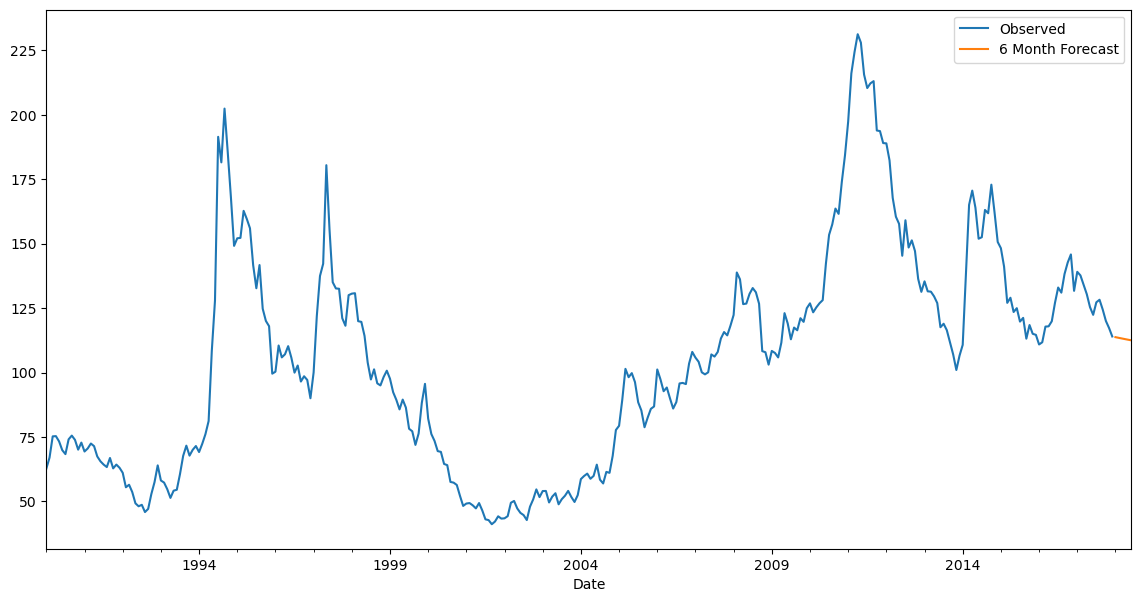

In [61]:
plt.figure(figsize=(14,7))
coffee_ts.plot(label='Observed', legend=True)
mean_forecast.plot(label='6 Month Forecast', legend=True)
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()